In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Dataset
California Housing dataset

**Features**
- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

**Target**
- median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).


In [39]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X = dataset.data
Y = dataset.target


In [32]:
print (X.shape)
X = pd.DataFrame(X, columns=dataset.feature_names)
X.head()



(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Transform data
Standardize the data so that the feature has a 0 mean and a standard deviation of 1. The new features will be the number of standard deviations away from the mean (z-score)

$x'=\frac{x-\bar{x}}{\sigma}$

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)
print(Xs)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


### Gradient descent for multi linear regression

In [126]:

# Multiple linear regression model
def predict(weights, bias, x, m):

    y = []
    for i in range(m):
        y.append(weights@x[i] + bias)

    return np.array(y)

    
# d/dw
def derivative_cost_weights(x, y, y_pred, m):

    sum = 0
    for i in range(m):
        sum += (y_pred[i] - y[i]) * x[i]

    return (1/m) * sum
    
# d/db
def derivative_cost_bias(y, y_pred, m):

    sum = 0
    for i in range(len(y)):
        sum += (y_pred[i] - y[i])

    return (1/m) * sum
   

# Cost function
def cost(y, y_pred, m):

    cost = 0
    for i in range(m):
        cost += (y_pred[i] - y[i])**2

    return (1/m) * cost


        
# gradient function
def gradient_descent(x, y, epochs = 1000):
    weights = np.random.randn(x.shape[1])    # w
    learning_rate = 0.001                    # alpha
    bias = 0                                 # b
    m = len(y)

    # Make a nice graph
    linear_cost = []

    for i in range(epochs):
        if i%100 == 0:
            print("Epoch : ", i)
            
        y_pred = predict(weights, bias, x, m)
        weights_temp = weights - learning_rate * derivative_cost_weights(x, y, y_pred, m) 
        bias_temp = bias - learning_rate * derivative_cost_bias(y, y_pred, m)

        weights = weights_temp
        bias = bias_temp

        linear_cost.append(cost(y, y_pred, m))
        
    plt.plot(np.arange(1, epochs), linear_cost[1:])
    plt.xlabel("epochs")
    plt.ylabel("cost")
    
    return weights,bias

Epoch :  0
Epoch :  100
Epoch :  200
Epoch :  300
Epoch :  400
Epoch :  500
Epoch :  600
Epoch :  700
Epoch :  800
Epoch :  900


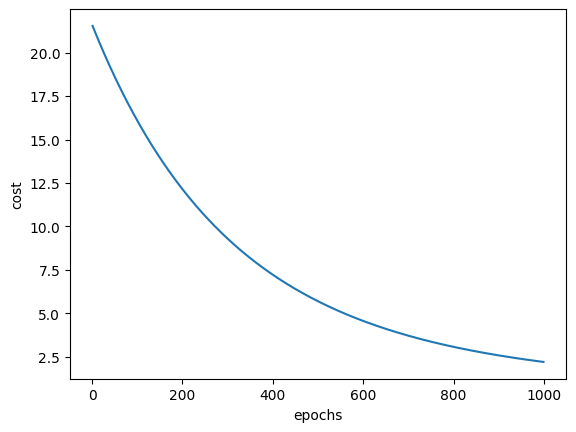

In [108]:
weights, bias = gradient_descent(Xs, Y, epochs=1000)

### Results

In [142]:
w = pd.Series(weights, index = dataset.feature_names)
b = pd.Series(bias, index=dataset.target_names)
display(w)
display(b)

MedInc        0.791825
HouseAge      0.402998
AveRooms     -0.091466
AveBedrms    -0.163882
Population    0.932738
AveOccup      0.096300
Latitude      0.258861
Longitude     0.399948
dtype: float64

MedHouseVal    1.307959
dtype: float64

In [128]:
y_pred = predict(weights, bias, Xs, len(Xs))


In [129]:
predicted=pd.DataFrame()
predicted["y_actual"]=Y
predicted["y_predicted"]=np.round(y_pred,1)
predicted


,y_actual,y_predicted
0,4.526,2.4
1,3.585,3.5
2,3.521,2.3
3,3.413,1.8
4,3.422,1.0
...,...,...
20635,0.781,-0.1
20636,0.771,-0.4
20637,0.923,-0.2
20638,0.847,-0.4


Text(0, 0.5, 'actual')

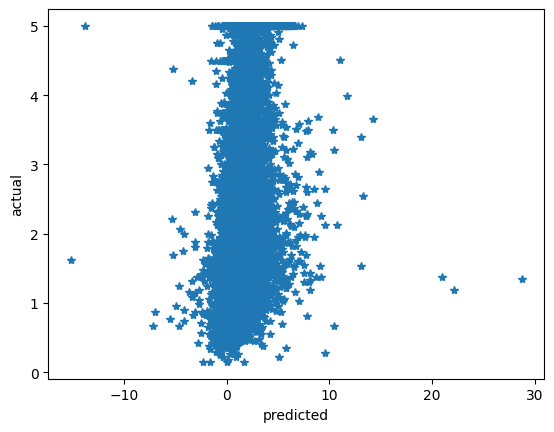

In [131]:
plt.plot(y_pred, Y, marker='*', ls='None')
plt.xlabel("predicted")
plt.ylabel("actual")